### Entropy calculation

In [1]:
import math

# probability of class "yes"
p_yes = 0.6

# probability of class "no"
p_no = 0.4

# calculate entropy
entropy = -(p_yes * math.log2(p_yes) + p_no * math.log2(p_no))
print(entropy)

0.9709505944546686


In [2]:
from scipy.stats import entropy

# probabilities of each class
probabilities = [0.40, 0.60]

# calculate entropy
entropy = entropy(probabilities,base=2)

print(entropy)

0.9709505944546688


### Decision Trees - Information gain



The Iris dataset is a classic and widely used dataset in machine learning and statistics. It contains measurements of 150 iris flowers from three different species:

* Iris setosa
* Iris versicolor
* Iris virginica


For each flower, the dataset includes four features:

* Sepal length in cm
* Sepal width in cm
* Petal length in cm
* Petal width in cm

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.data)  # Print the feature data
print(iris.target)  # Print the species labels
print(iris.feature_names)  # Print the feature names

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

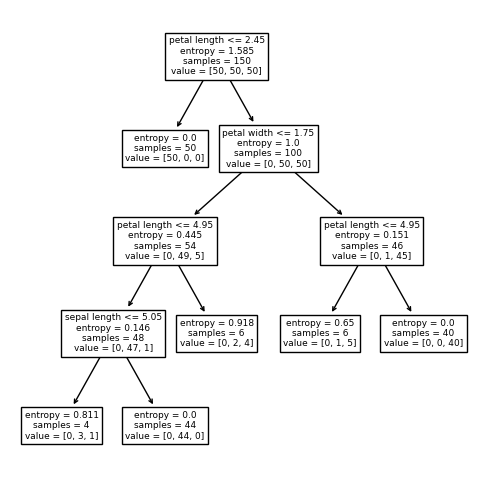

In [4]:
from sklearn import tree
from matplotlib import pyplot as plt

X = iris.data
y = iris.target

#build decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
#max_depth represents max level allowed in each tree, min_samples_leaf minumum samples storable in leaf node

#fit the tree to iris dataset
clf.fit(X,y)

#plot decision tree
fig, ax = plt.subplots(figsize=(6, 6)) #figsize value changes the size of plot
tree.plot_tree(clf,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

In [5]:
# make predictions
predictions = clf.predict([[5, 3.5, 1.3, 0.3]])
print(predictions)

[0]


### Decision Trees - Information gain

The code adds small value 1e-7 to the split information to avoid division by zero.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris


def entropy(y):
    """Compute the entropy of a label distribution."""
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities + 1e-7))

def information_gain(X, y, feature):
    """Compute the Information Gain for a given feature."""
    total_entropy = entropy(y)
    values, counts = np.unique(X[feature], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(y[X[feature] == values[i]]) for i in range(len(values)))
    return total_entropy - weighted_entropy

def split_value(X, feature):
    """Compute the Intrinsic Value for a given feature."""
    values, counts = np.unique(X[feature], return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities + 1e-7))

def gain_ratio(X, y, feature):
    """Compute the Gain Ratio for a given feature."""
    info_gain = information_gain(X, y, feature)
    sp = split_value(X, feature)
    return info_gain / (sp + 1e-7)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert X to a Pandas DataFrame
X_df = pd.DataFrame(X, columns=iris.feature_names)

# Compute Gain Ratio for each feature
gain_ratios = {feature: gain_ratio(X_df, y, feature) for feature in X_df.columns}

# Print the Gain Ratio values
for feature, gr in gain_ratios.items():
    print(f'Gain Ratio for {feature}: {gr:.3f}')

# Find the best feature for splitting
best_feature = max(gain_ratios, key=gain_ratios.get)
print(f'Best feature for splitting: {best_feature}')

Gain Ratio for sepal length (cm): 0.182
Gain Ratio for sepal width (cm): 0.128
Gain Ratio for petal length (cm): 0.287
Gain Ratio for petal width (cm): 0.355
Best feature for splitting: petal width (cm)


### Decision Trees - Gini index

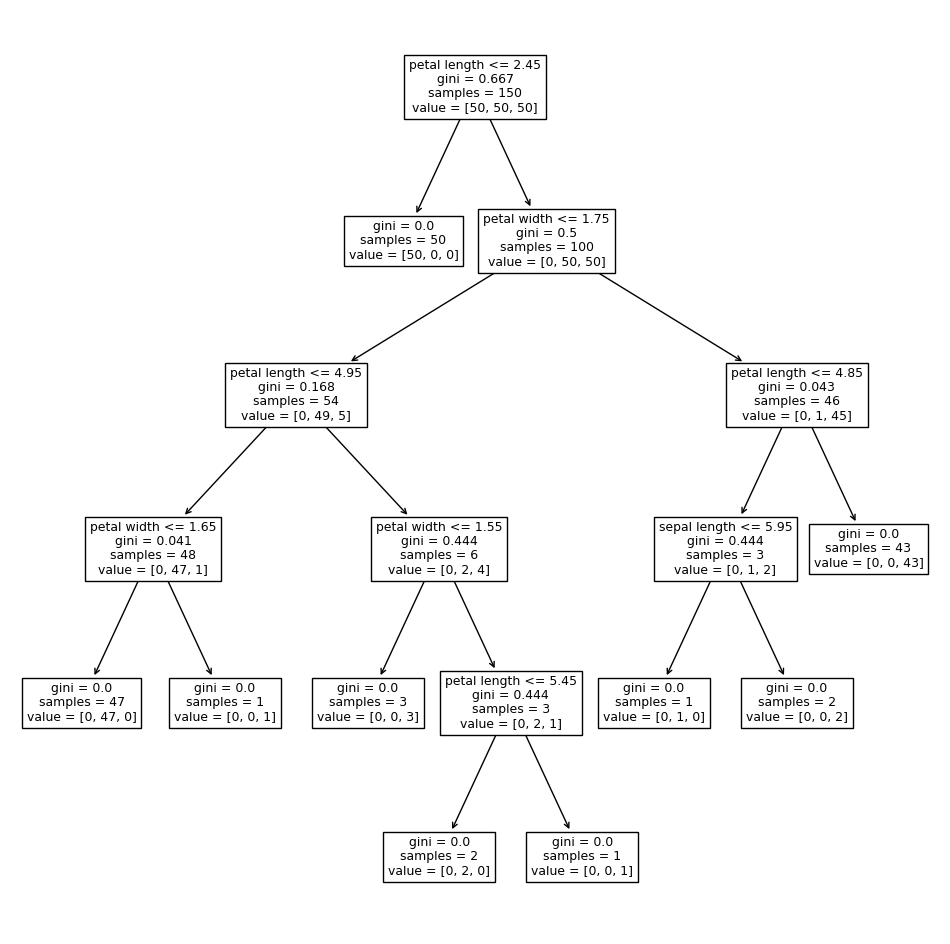

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42, criterion='gini')
clf.fit(X, y)

# Get the feature importances (which include the gain ratio)
importances = clf.feature_importances_

#plot decision tree
fig, ax = plt.subplots(figsize=(12, 12)) #figsize value changes the size of plot
tree.plot_tree(clf,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

### Overfitting

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Train a decision tree on the training set
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the testing set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compare the accuracy on the training set and the testing set
print("Accuracy on the training set:", train_accuracy)
print("Accuracy on the testing set:", test_accuracy)

Accuracy on the training set: 1.0
Accuracy on the testing set: 1.0


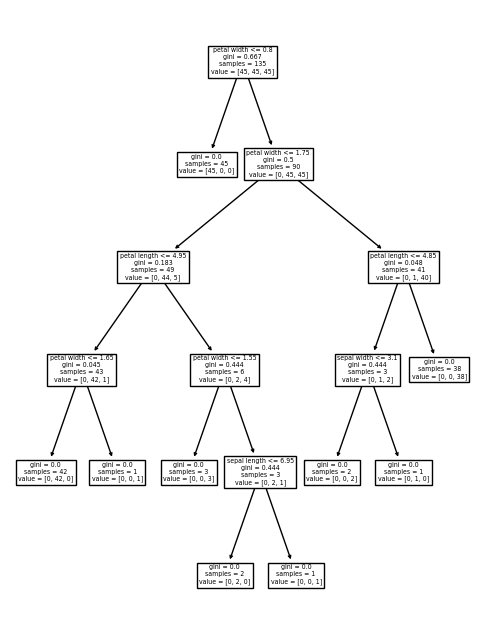

In [9]:
from sklearn import tree

#plot decision tree
fig, ax = plt.subplots(figsize=(6, 8)) #figsize value changes the size of plot
tree.plot_tree(clf,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

Hyperparameters tuning for pre-pruning

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'criterion':["gini","entropy"],
'max_depth': [2, 3, 4, 5],
'min_samples_leaf': [10, 20, 30],
'min_samples_split': [20, 30, 40]}

# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Create an instance of the GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 40}


Post-pruning

DecisionTree in sklearn has a function called cost_complexity_pruning_path, which takes the trained decision tree model as input and returns the effective alphas of each subtree as well as the corresponding impurities.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

path = clf.cost_complexity_pruning_path(X, y)
alphas, impurities = path.ccp_alphas, path.impurities
print(alphas)

[0.         0.00099752 0.00133333 0.00133333 0.00133333 0.00154048
 0.0016     0.00171429 0.00177083 0.00186207 0.00195668 0.00196825
 0.00198042 0.00228571 0.00231111 0.00257524 0.00265843 0.00267857
 0.00277525 0.0032436  0.00367229 0.00403226 0.00403993 0.04405439
 0.05347235 0.31685375]


In [12]:
param_grid = {'ccp_alpha': alphas}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X, y)

best_alpha = grid_search.best_params_['ccp_alpha']
print(best_alpha)

0.0036722911051212913


In [13]:
# Train the tree using the best value of alpha
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0036722911051212913, random_state=0)